**Install Pycaret**

In [2]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 374.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 74.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3

In [1]:
import pycaret
print(pycaret.__version__)

3.3.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import library yang dibutuhkan
from pycaret.classification import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler # Added this import
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif # Ensure these are also imported early
from sklearn.model_selection import train_test_split


In [4]:
# 1. Load dataset AEEEM (JDT sebagai sumber, Mylyn sebagai target)
# Ganti dengan path dataset Anda
source_data = pd.read_csv('/content/drive/MyDrive/WPDP/dataset/PDE.csv')  # Dataset sumber: PDE
target_data = pd.read_csv('/content/drive/MyDrive/WPDP/dataset/EQ.csv')  # Dataset target: EQ

source_data.head()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,0.0,0.003976,0.005189,2.0,0.0,3.03,0.105389,0.004203,2.04,0.004297,...,0.010649,0.002227,0.027707,14.0,6.0,0.008929,4.28,0.209245,0.004770,b'0'
1,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,51.0,3.0,0.000000,0.00,0.000000,0.000000,b'0'
2,8.0,0.002264,0.000000,7.0,0.0,0.00,0.032927,0.000000,0.00,0.000000,...,0.002006,0.000713,0.004680,14.0,2.0,0.001619,5.44,0.054240,0.002453,b'0'
3,2.0,0.000000,0.001689,3.0,0.0,0.00,0.061022,0.000000,2.06,0.000000,...,0.001873,0.000000,0.005933,0.0,6.0,0.003134,6.39,0.046823,0.000000,b'1'
4,1.0,0.005692,0.007865,3.0,0.0,6.14,0.109004,0.001720,5.09,0.004365,...,0.002715,0.000000,0.007782,0.0,18.0,0.007727,8.66,0.051960,0.006210,b'0'


In [5]:
target_data.head()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,3.0,0.002547,0.002555,4.0,0.00,3.04,0.393707,0.003049,1.01,0.004091,...,0.005627,0.000000,0.004406,8.0,8.0,0.008431,3.50,0.103594,0.003611,b'1'
1,37.0,0.008643,0.004756,71.0,0.00,14.37,2.093750,0.001481,2.02,0.015332,...,0.018761,0.001486,0.060301,7.0,7.0,0.021602,43.12,0.328692,0.009906,b'1'
2,3.0,0.001479,0.009143,5.0,1.01,3.08,0.484675,0.000000,6.17,0.001953,...,0.003117,0.001486,0.002325,7.0,2.0,0.011859,4.68,0.125841,0.001655,b'0'
3,10.0,0.005642,0.005395,38.0,0.00,1.06,0.811584,0.000876,6.07,0.000739,...,0.020376,0.002338,0.030608,17.0,10.0,0.020478,24.06,0.170416,0.007000,b'1'
4,1.0,0.001350,0.000000,1.0,1.01,1.01,0.031940,0.000876,0.00,0.000000,...,0.000566,0.003017,0.001492,22.0,7.0,0.000652,2.13,0.055912,0.001572,b'1'


In [6]:
# 2. Pra-pemrosesan data
# Konversi kolom 'class' dari b'1'/b'0' ke 1/0
source_data['class'] = source_data['class'].astype(str).str.replace(r"^b'|\'$", "", regex=True).astype(int)
target_data['class'] = target_data['class'].astype(str).str.replace(r"^b'|\'$", "", regex=True).astype(int)


In [7]:
print("\nDistribusi Kelas Target:")
print(source_data['class'].value_counts())
print("\nDistribusi Kelas Target:")
print(target_data['class'].value_counts())


Distribusi Kelas Target:
class
0    1288
1     209
Name: count, dtype: int64

Distribusi Kelas Target:
class
0    195
1    129
Name: count, dtype: int64


In [7]:
print(source_data.duplicated().sum())  # Cek duplikasi baris
print(target_data.duplicated().sum())

14
59


In [8]:
# Cek apakah ada indeks duplikat
print("Duplikasi indeks di source_data:", source_data.index.duplicated().any())
print("Duplikasi indeks di target_data:", target_data.index.duplicated().any())

Duplikasi indeks di source_data: False
Duplikasi indeks di target_data: False


In [9]:
train_features = source_data.drop(columns='class').columns.tolist()
test_features = target_data.drop(columns='class', errors='ignore').columns.tolist()

# Cek apakah keduanya sama
if train_features == test_features:
    print("✅ Fitur training dan testing SAMA.")
else:
    print("❌ Fitur TIDAK sama!")

    # Tampilkan perbedaannya
    missing_in_test = set(train_features) - set(test_features)
    missing_in_train = set(test_features) - set(train_features)

    if missing_in_test:
        print("🔻 Fitur yang ADA di training TAPI TIDAK ada di testing:")
        print(missing_in_test)

    if missing_in_train:
        print("🔺 Fitur yang ADA di testing TAPI TIDAK ada di training:")
        print(missing_in_train)


✅ Fitur training dan testing SAMA.


In [10]:
# Inisialisasi PyCaret dengan index=False
from pycaret.classification import setup
clf = setup(data=source_data,
            target='class',
            #test_data=target_data,
            preprocess=True,
            normalize=True,
            #feature_selection=True,  # Seleksi fitur
            feature_selection_method='classic',  # Berdasarkan pentingnya fitur
            n_features_to_select=10,  # Pilih 10 fitur terbaik
            fix_imbalance=True,  # Penanganan ketidakseimbangan dengan SMOTE
            index=False)

,Description,Value
0,Session id,5310
1,Target,class
2,Target type,Binary
3,Original data shape,"(1497, 62)"
4,Transformed data shape,"(2252, 62)"
5,Transformed train set shape,"(1802, 62)"
6,Transformed test set shape,"(450, 62)"
7,Numeric features,61
8,Preprocess,True
9,Imputation type,simple


In [11]:
# 4. Bandingkan model
# Membandingkan performa berbagai model untuk memilih yang terbaik
best_model = compare_models(n_select=1, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8186,0.7259,0.4733,0.3896,0.4246,0.3192,0.3226,0.3950
catboost,CatBoost Classifier,0.8616,0.7788,0.3486,0.5201,0.4096,0.3354,0.3479,17.4000
nb,Naive Bayes,0.8377,0.7606,0.4038,0.4334,0.4081,0.3162,0.3213,0.0510
knn,K Neighbors Classifier,0.7307,0.7119,0.5957,0.2831,0.3831,0.2387,0.2657,0.0560
rf,Random Forest Classifier,0.8406,0.7933,0.3495,0.4329,0.3794,0.2901,0.2960,0.7750
xgboost,Extreme Gradient Boosting,0.8549,0.7712,0.3143,0.5009,0.3778,0.3007,0.3155,0.4660
et,Extra Trees Classifier,0.8444,0.7882,0.3348,0.4589,0.3750,0.2899,0.3006,0.4980
lr,Logistic Regression,0.7498,0.7038,0.5067,0.2916,0.3677,0.2295,0.2422,1.1140
lightgbm,Light Gradient Boosting Machine,0.8501,0.7776,0.2952,0.4682,0.3527,0.2739,0.2876,4.0700
ridge,Ridge Classifier,0.7489,0.6928,0.4733,0.2833,0.3502,0.2108,0.2219,0.0500


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [12]:
# Membuat model
print("Membuat Random Forest")
rf = create_model('rf')
print("-" * 50)

print("Membuat K-Nearest Neighbors")
knn = create_model('knn')
print("-" * 50)

print("Membuat Support Vector Machine")
svm = create_model('svm')
print("-" * 50)

print("Membuat Logistic Regression")
lr = create_model('lr')
print("-" * 50)

print("Membuat CatBoost Classifier")
catboost = create_model('catboost')
print("-" * 50)


Membuat Random Forest


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8762,0.7940,0.2857,0.5714,0.3810,0.3206,0.3444
1,0.7905,0.7707,0.4000,0.3158,0.3529,0.2300,0.2323
2,0.8667,0.8411,0.4667,0.5385,0.5000,0.4235,0.4250
3,0.8190,0.7333,0.2667,0.3333,0.2963,0.1939,0.1955
4,0.8286,0.8174,0.2667,0.3636,0.3077,0.2125,0.2158
5,0.8286,0.6693,0.4000,0.4000,0.4000,0.3000,0.3000
6,0.8571,0.8681,0.4000,0.5000,0.4444,0.3636,0.3666
7,0.8269,0.8107,0.3571,0.3571,0.3571,0.2571,0.2571
8,0.8750,0.9175,0.2857,0.5714,0.3810,0.3199,0.3438


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

--------------------------------------------------
Membuat K-Nearest Neighbors


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7429,0.6699,0.5000,0.2593,0.3415,0.2012,0.2179
1,0.6952,0.7285,0.5333,0.2424,0.3333,0.1704,0.1926
2,0.7810,0.7907,0.7333,0.3667,0.4889,0.3686,0.4045
3,0.6667,0.6726,0.5333,0.2222,0.3137,0.1404,0.1638
4,0.7333,0.7459,0.6667,0.3030,0.4167,0.2741,0.3099
5,0.7048,0.6459,0.4667,0.2333,0.3111,0.1490,0.1635
6,0.7333,0.7322,0.6000,0.2903,0.3913,0.2462,0.2728
7,0.7115,0.7135,0.6429,0.2647,0.3750,0.2277,0.2656
8,0.7692,0.7675,0.7857,0.3438,0.4783,0.3580,0.4085


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

--------------------------------------------------
Membuat Support Vector Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.5573,0.6429,0.1406,0.2308,0.0153,0.0268
1,0.5048,0.6193,0.7333,0.1864,0.2973,0.0900,0.1411
2,0.6476,0.8200,0.8000,0.2609,0.3934,0.2269,0.2978
3,0.8095,0.7926,0.6000,0.3913,0.4737,0.3636,0.3760
4,0.6571,0.5607,0.4667,0.2000,0.2800,0.1000,0.1155
5,0.6952,0.6570,0.5333,0.2424,0.3333,0.1704,0.1926
6,0.6667,0.6474,0.5333,0.2222,0.3137,0.1404,0.1638
7,0.6827,0.7222,0.5714,0.2286,0.3265,0.1662,0.1961
8,0.7500,0.7857,0.6429,0.3000,0.4091,0.2762,0.3085


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

--------------------------------------------------
Membuat Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8069,0.6429,0.3750,0.4737,0.3671,0.3870
1,0.7143,0.7533,0.5333,0.2581,0.3478,0.1923,0.2131
2,0.8286,0.7815,0.6667,0.4348,0.5263,0.4273,0.4418
3,0.7905,0.7089,0.4667,0.3333,0.3889,0.2667,0.2722
4,0.6667,0.5926,0.4667,0.2059,0.2857,0.1091,0.1246
5,0.6952,0.6644,0.4000,0.2069,0.2727,0.1040,0.1130
6,0.7619,0.6526,0.4667,0.2917,0.3590,0.2222,0.2315
7,0.7788,0.7135,0.5714,0.3200,0.4103,0.2872,0.3055
8,0.8269,0.6571,0.3571,0.3571,0.3571,0.2571,0.2571


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

--------------------------------------------------
Membuat CatBoost Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8762,0.7975,0.2857,0.5714,0.3810,0.3206,0.3444
1,0.8286,0.7467,0.3333,0.3846,0.3571,0.2588,0.2597
2,0.9143,0.8793,0.6000,0.7500,0.6667,0.6182,0.6233
3,0.8286,0.7185,0.3333,0.3846,0.3571,0.2588,0.2597
4,0.8381,0.7719,0.1333,0.3333,0.1905,0.1185,0.1340
5,0.8190,0.6459,0.3333,0.3571,0.3448,0.2400,0.2402
6,0.8381,0.8459,0.2667,0.4000,0.3200,0.2323,0.2384
7,0.8462,0.7937,0.3571,0.4167,0.3846,0.2973,0.2985
8,0.8846,0.8857,0.3571,0.6250,0.4545,0.3953,0.4148


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

--------------------------------------------------


**Uji data sebelum di tuning**

In [13]:
# Prediksi dengan dataset target JDT menggunakan masing-masing model yang sudah di-tuned
rf_predictions = predict_model(rf, data=target_data)
knn_predictions = predict_model(knn, data=target_data)
svm_predictions = predict_model(svm, data=target_data)
lr_predictions = predict_model(lr, data=target_data)
catboost_predictions = predict_model(catboost, data=target_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6296,0.5680,0.3643,0.5529,0.4393,0.1799,0.1886


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4691,0.4936,0.5659,0.3862,0.4591,-0.0269,-0.0288


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6914,0.7029,0.7597,0.5868,0.6622,0.3866,0.3975


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7377,0.7767,0.7442,0.6486,0.6931,0.4659,0.4693


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6914,0.5682,0.3411,0.7458,0.4681,0.2909,0.3351


**Simpan Model sebelum dilakukan tuning**

In [14]:
# Simpan masing-masing model
save_model(rf, 'PDE_rf_model')
save_model(knn, 'PDE_knn_model')
save_model(svm, 'PDE_svm_model')
save_model(lr, 'PDE_lr_model')
save_model(catboost, 'PDE_catboost_model')

print("Model telah disimpan untuk penggunaan di masa depan.")

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Model telah disimpan untuk penggunaan di masa depan.


**Tuning Models**

In [15]:
# Tuning masing-masing model dengan optimize='F1'
print("Tuning Random Forest")
tuned_rf = tune_model(rf, optimize='F1', n_iter=10)
print("-" * 80)

print("Tuning K-Nearest Neighbors")
tuned_knn = tune_model(knn, optimize='F1', n_iter=10)
print("-" * 80)

print("Tuning Support Vector Machine")
tuned_svm = tune_model(svm, optimize='F1', n_iter=10)
print("-" * 80)

print("Tuning Logistic Regression")
tuned_lr = tune_model(lr, optimize='F1', n_iter=10)
print("-" * 80)

print("Tuning CatBoost Classifier")
tuned_catboost = tune_model(catboost, optimize='F1', n_iter=10)
print("-" * 80)

Tuning Random Forest


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.7967,0.5000,0.4667,0.4828,0.4000,0.4003
1,0.7524,0.7689,0.6667,0.3226,0.4348,0.3000,0.3324
2,0.8381,0.8493,0.6667,0.4545,0.5405,0.4465,0.4586
3,0.7619,0.7252,0.3333,0.2500,0.2857,0.1463,0.1485
4,0.8095,0.8000,0.5333,0.3810,0.4444,0.3333,0.3402
5,0.8095,0.6259,0.4000,0.3529,0.3750,0.2632,0.2639
6,0.8000,0.8474,0.5333,0.3636,0.4324,0.3163,0.3248
7,0.8365,0.8278,0.6429,0.4286,0.5143,0.4207,0.4332
8,0.9135,0.9452,0.7143,0.6667,0.6897,0.6394,0.6400


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


--------------------------------------------------------------------------------
Tuning K-Nearest Neighbors


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8190,0.7531,0.5714,0.3810,0.4571,0.3537,0.3642
1,0.7524,0.6904,0.6000,0.3103,0.4091,0.2720,0.2957
2,0.8286,0.8441,0.8000,0.4444,0.5714,0.4750,0.5071
3,0.7810,0.6396,0.4000,0.3000,0.3429,0.2146,0.2178
4,0.7810,0.8204,0.6000,0.3462,0.4390,0.3149,0.3333
5,0.7333,0.5967,0.4000,0.2400,0.3000,0.1478,0.1552
6,0.7429,0.7700,0.4667,0.2692,0.3415,0.1957,0.2072
7,0.7692,0.7750,0.6429,0.3214,0.4286,0.3036,0.3322
8,0.8462,0.9151,0.8571,0.4615,0.6000,0.5152,0.5530


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


--------------------------------------------------------------------------------
Tuning Support Vector Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.6652,0.4286,0.3158,0.3636,0.2482,0.2523
1,0.7238,0.6978,0.3333,0.2083,0.2564,0.0978,0.1019
2,0.8286,0.8511,0.5333,0.4211,0.4706,0.3700,0.3737
3,0.7905,0.6715,0.3333,0.2941,0.3125,0.1895,0.1900
4,0.7810,0.8104,0.4000,0.3000,0.3429,0.2146,0.2178
5,0.7143,0.5822,0.3333,0.2000,0.2500,0.0870,0.0913
6,0.8190,0.7985,0.4000,0.3750,0.3871,0.2811,0.2813
7,0.7788,0.7905,0.6429,0.3333,0.4390,0.3181,0.3448
8,0.8654,0.8873,0.7857,0.5000,0.6111,0.5345,0.5545


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


--------------------------------------------------------------------------------
Tuning Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8179,0.6429,0.3750,0.4737,0.3671,0.3870
1,0.6857,0.7319,0.4667,0.2188,0.2979,0.1283,0.1436
2,0.7619,0.7793,0.5333,0.3077,0.3902,0.2553,0.2702
3,0.7524,0.7215,0.4000,0.2609,0.3158,0.1727,0.1786
4,0.6571,0.6037,0.4667,0.2000,0.2800,0.1000,0.1155
5,0.7048,0.6837,0.4000,0.2143,0.2791,0.1143,0.1231
6,0.7429,0.6119,0.4667,0.2692,0.3415,0.1957,0.2072
7,0.7500,0.7175,0.5714,0.2857,0.3810,0.2455,0.2687
8,0.8173,0.6690,0.3571,0.3333,0.3448,0.2388,0.2390


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
--------------------------------------------------------------------------------
Tuning CatBoost Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7714,0.7174,0.5000,0.2917,0.3684,0.2405,0.2535
1,0.6667,0.7548,0.7333,0.2619,0.3860,0.2222,0.2778
2,0.7810,0.8341,0.6667,0.3571,0.4651,0.3429,0.3693
3,0.7238,0.6748,0.4000,0.2308,0.2927,0.1362,0.1441
4,0.7524,0.7556,0.4667,0.2800,0.3500,0.2087,0.2191
5,0.6857,0.6037,0.3333,0.1786,0.2326,0.0571,0.0615
6,0.8000,0.8689,0.8000,0.4000,0.5333,0.4235,0.4648
7,0.7788,0.7774,0.6429,0.3333,0.4390,0.3181,0.3448
8,0.8365,0.8980,0.7143,0.4348,0.5405,0.4482,0.4686


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


--------------------------------------------------------------------------------


In [16]:
# Optional: Membandingkan performa model setelah tuning
compare_models([tuned_rf, tuned_knn, tuned_svm, tuned_lr, tuned_catboost], sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Random Forest Classifier,0.7985,0.7882,0.5205,0.3563,0.4197,0.3042,0.3140,3.5870
4,CatBoost Classifier,0.7603,0.7757,0.6029,0.3186,0.4148,0.2837,0.3069,0.3680
1,K Neighbors Classifier,0.7793,0.7489,0.5619,0.3291,0.4124,0.2884,0.3060,0.0740
2,SVM - Linear Kernel,0.7909,0.7451,0.4805,0.3348,0.3926,0.2723,0.2796,0.0610
3,Logistic Regression,0.7546,0.7057,0.5071,0.2983,0.3715,0.2354,0.2488,0.0680


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=5, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.005,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=5310, verbose=0, warm_start=False)

**Uji Data setelah dilakukan Tuning Models**

In [17]:
# Prediksi dengan dataset target EQ menggunakan masing-masing model yang sudah di-tuned
rf_predictions = predict_model(tuned_rf, data=target_data)
knn_predictions = predict_model(tuned_knn, data=target_data)
svm_predictions = predict_model(tuned_svm, data=target_data)
lr_predictions = predict_model(tuned_lr, data=target_data)
catboost_predictions = predict_model(tuned_catboost, data=target_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7099,0.7132,0.5271,0.6733,0.5913,0.3715,0.3782


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6790,0.5571,0.4341,0.6437,0.5185,0.2912,0.3039


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7037,0.6463,0.3643,0.7705,0.4947,0.3212,0.3663


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7377,0.7767,0.7442,0.6486,0.6931,0.4659,0.4693


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7160,0.7514,0.6202,0.6504,0.6349,0.4028,0.4031


**Plot Model Hasil Prediksi**

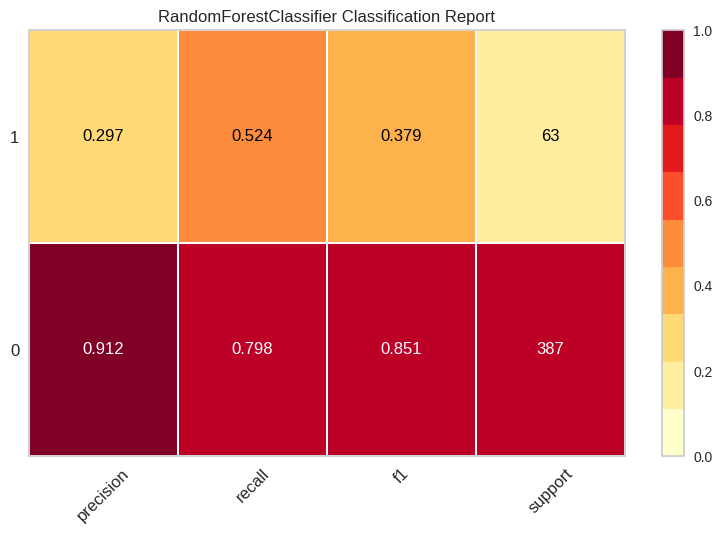

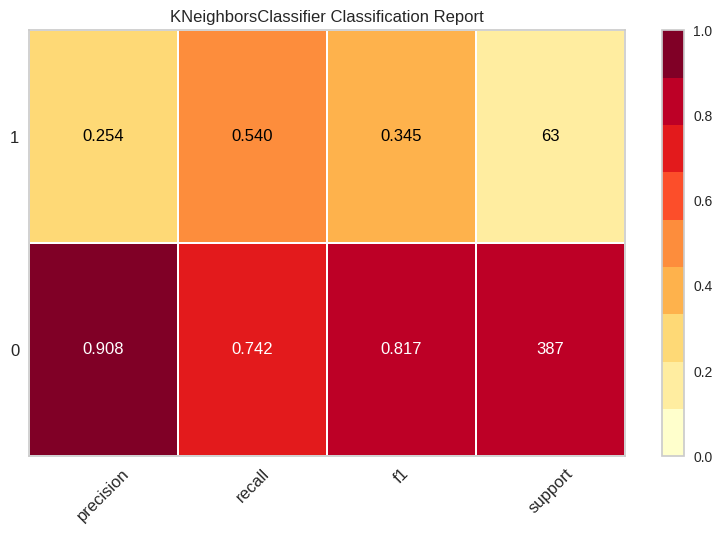

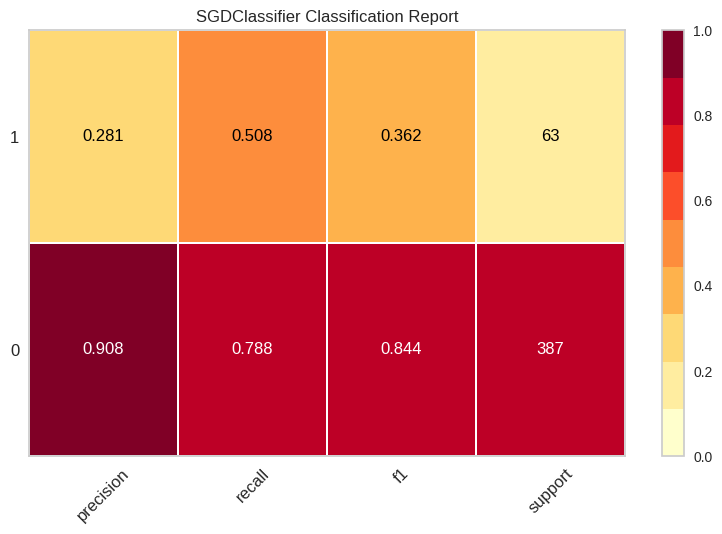

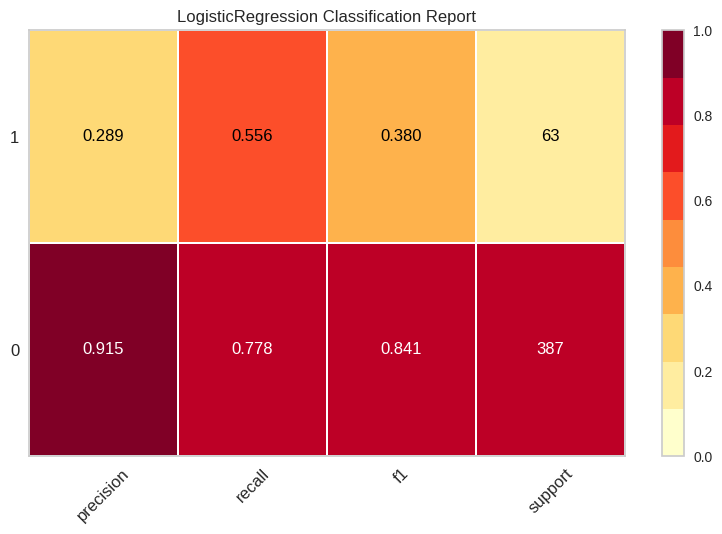

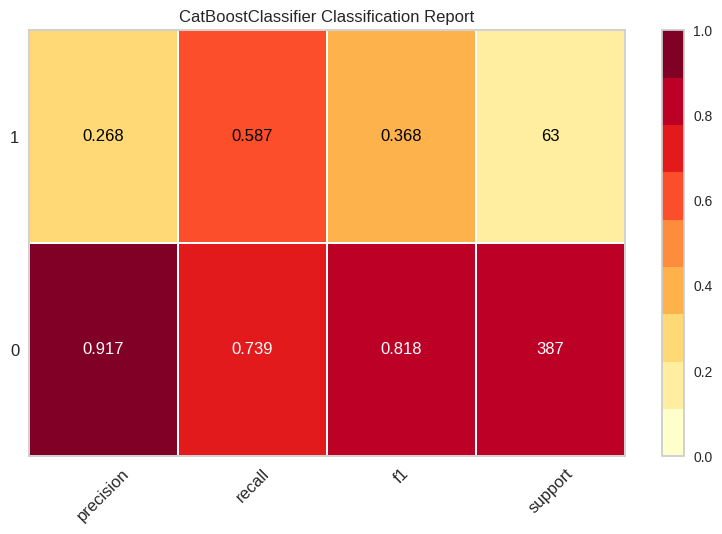

In [18]:
# plot model
#plot_model(tuned_rf,tuned_knn,tuned_svm,tuned_lr,tuned_catboost, plot = 'F1', target_data = True)

plot_model(tuned_rf, plot='class_report')
plot_model(tuned_knn, plot='class_report')
plot_model(tuned_svm, plot='class_report')
plot_model(tuned_lr, plot='class_report')
plot_model(tuned_catboost, plot='class_report')

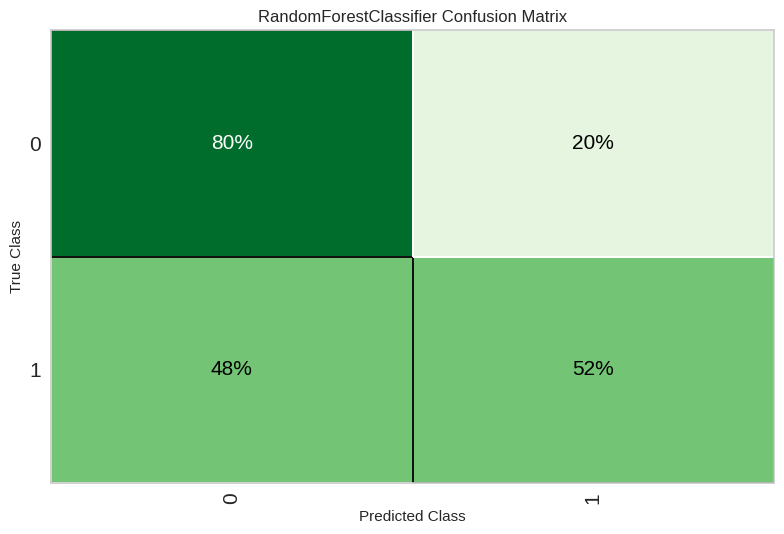

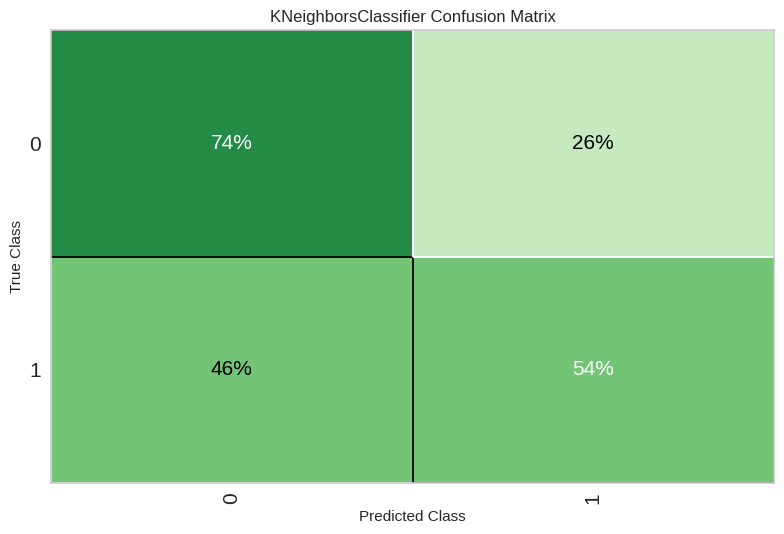

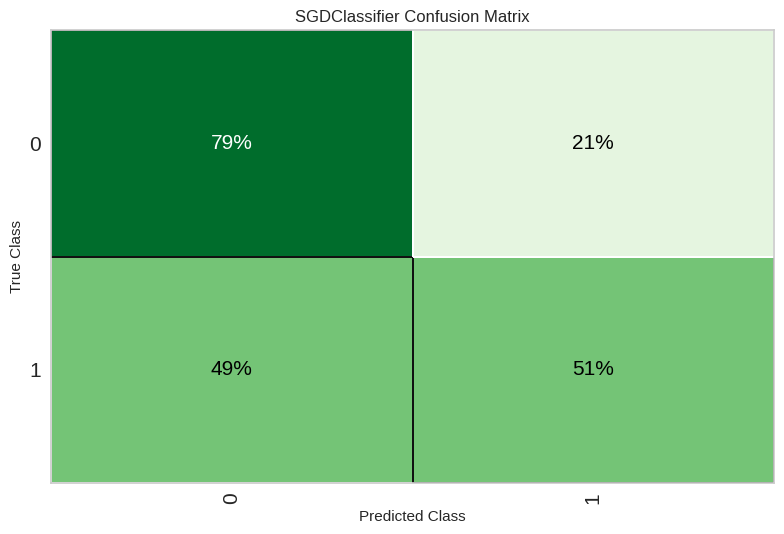

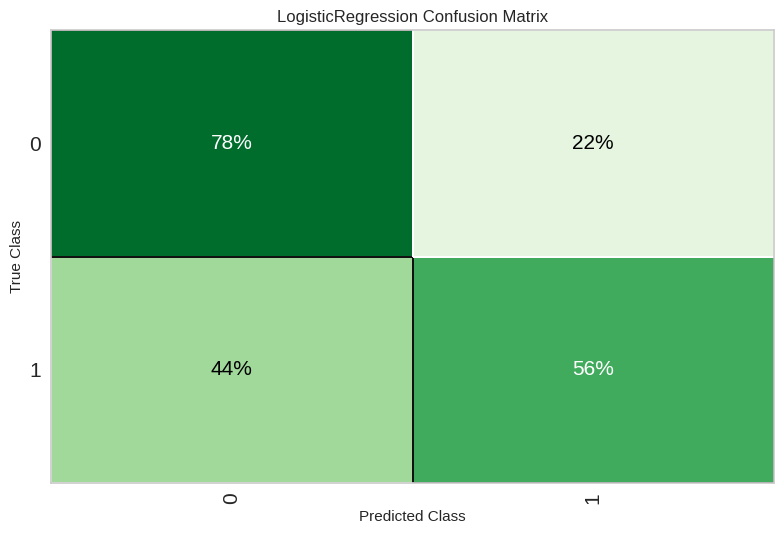

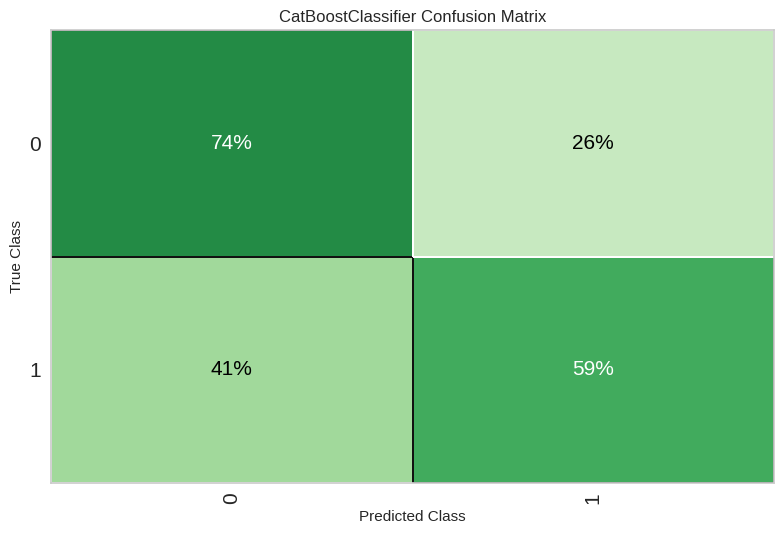

In [19]:
#plot_model(lr, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(tuned_rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(tuned_knn, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(tuned_svm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(tuned_lr, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(tuned_catboost, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

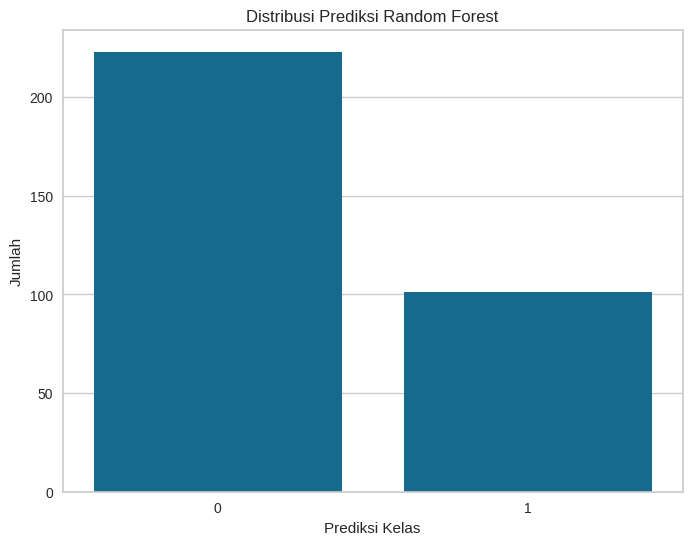

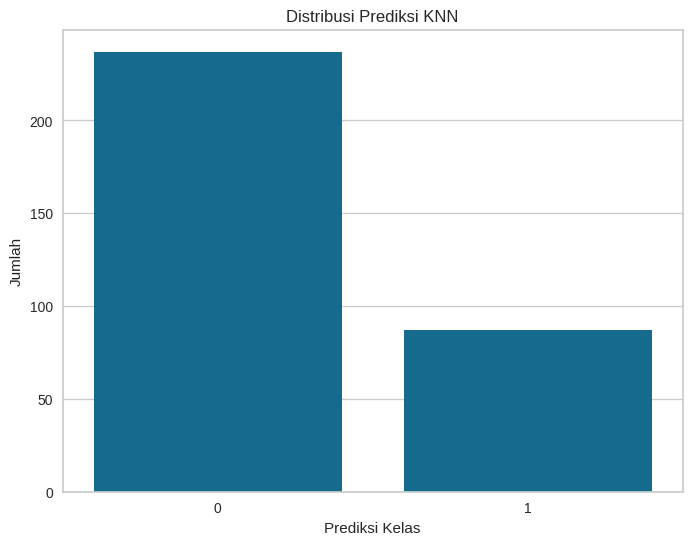

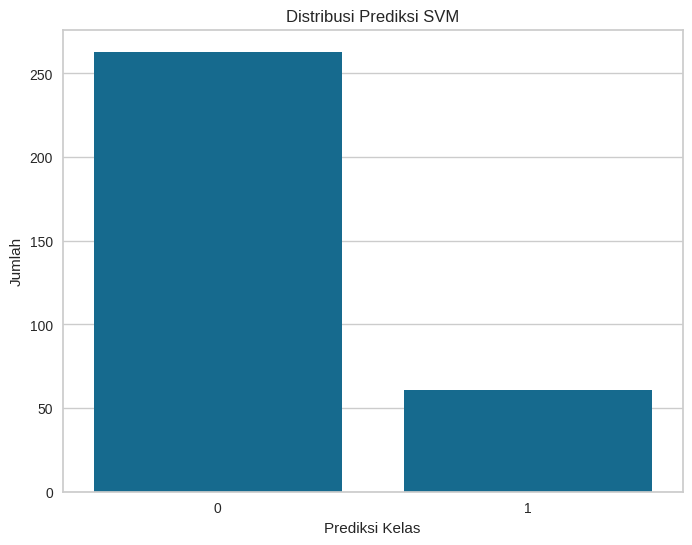

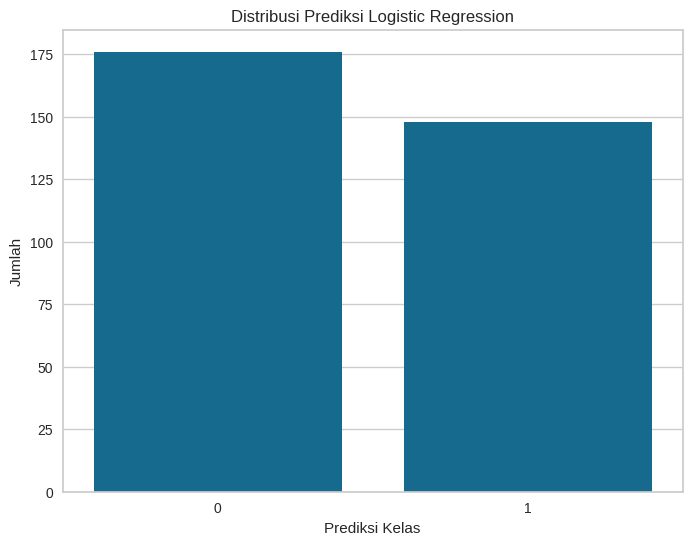

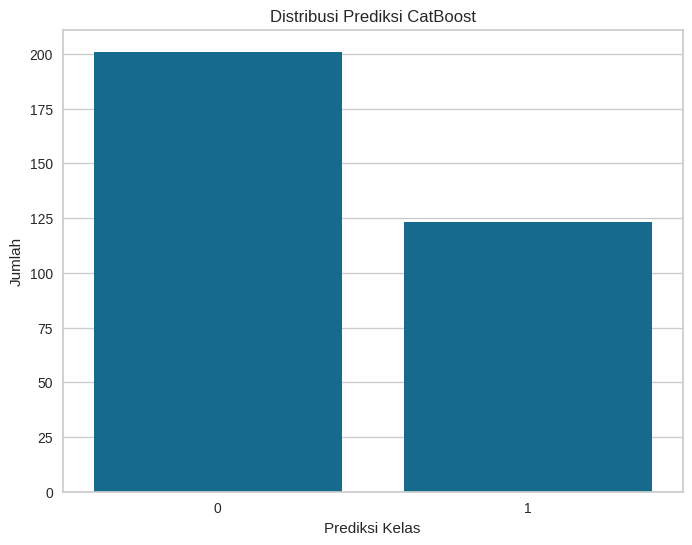

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk plot distribusi prediksi
def plot_prediction_distribution(predictions, model_name):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='prediction_label', data=predictions)
    plt.title(f'Distribusi Prediksi {model_name}')
    plt.xlabel('Prediksi Kelas')
    plt.ylabel('Jumlah')
    plt.show()

# Plot untuk setiap model
plot_prediction_distribution(rf_predictions, 'Random Forest')
plot_prediction_distribution(knn_predictions, 'KNN')
plot_prediction_distribution(svm_predictions, 'SVM')
plot_prediction_distribution(lr_predictions, 'Logistic Regression')
plot_prediction_distribution(catboost_predictions, 'CatBoost')

<Figure size 1000x600 with 0 Axes>

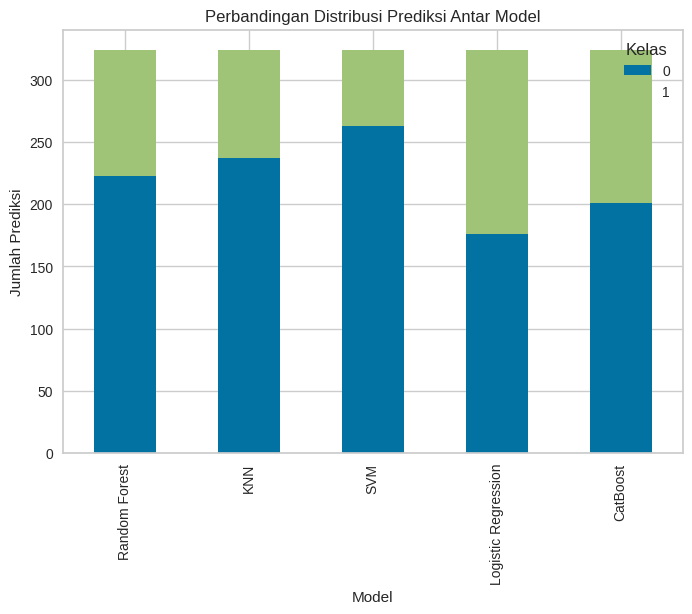

In [21]:
import pandas as pd

# Gabungkan semua prediksi ke dalam satu DataFrame
all_predictions = pd.DataFrame({
    'Random Forest': rf_predictions['prediction_label'],
    'KNN': knn_predictions['prediction_label'],
    'SVM': svm_predictions['prediction_label'],
    'Logistic Regression': lr_predictions['prediction_label'],
    'CatBoost': catboost_predictions['prediction_label']
})

# Plot distribusi prediksi semua model
plt.figure(figsize=(10, 6))
all_predictions.apply(lambda x: x.value_counts()).T.plot(kind='bar', stacked=True)
plt.title('Perbandingan Distribusi Prediksi Antar Model')
plt.xlabel('Model')
plt.ylabel('Jumlah Prediksi')
plt.legend(title='Kelas')
plt.show()

In [22]:
from pycaret.classification import *

# Asumsi JDT memiliki kolom target 'class'
# Evaluasi performa masing-masing model
# PyCaret uses the setup data by default
print("Evaluasi Random Forest")
evaluate_model(tuned_rf)
print("-" * 100)

print("Evaluasi K-Nearest Neighbors")
evaluate_model(tuned_knn)
print("-" * 100)

print("Evaluasi Support Vector Machine")
evaluate_model(tuned_svm)
print("-" * 100)

print("Evaluasi Logistic Regression")
evaluate_model(tuned_lr)
print("-" * 100)

print("Evaluasi CatBoost Classifier")
evaluate_model(tuned_catboost)
print("-" * 100)

Evaluasi Random Forest


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

----------------------------------------------------------------------------------------------------
Evaluasi K-Nearest Neighbors


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

----------------------------------------------------------------------------------------------------
Evaluasi Support Vector Machine


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

----------------------------------------------------------------------------------------------------
Evaluasi Logistic Regression


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

----------------------------------------------------------------------------------------------------
Evaluasi CatBoost Classifier


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

----------------------------------------------------------------------------------------------------


In [23]:
# Simpan prediksi ke file CSV
rf_predictions.to_csv('rf_predictions_PDE-EQ.csv', index=False)
knn_predictions.to_csv('knn_predictions_PDE-EQ.csv', index=False)
svm_predictions.to_csv('svm_predictions_PDE-EQ.csv', index=False)
lr_predictions.to_csv('lr_predictions_PDE-EQ.csv', index=False)
catboost_predictions.to_csv('catboost_predictions_PDE-EQ.csv', index=False)

print("Hasil prediksi telah disimpan ke file CSV.")

Hasil prediksi telah disimpan ke file CSV.


In [24]:
# Simpan masing-masing model
save_model(tuned_rf, 'PDE_tuned_rf_model')
save_model(tuned_knn, 'PDE_tuned_knn_model')
save_model(tuned_svm, 'PDE_tuned_svm_model')
save_model(tuned_lr, 'PDE_tuned_lr_model')
save_model(tuned_catboost, 'PDE_tuned_catboost_model')

print("Model telah disimpan untuk penggunaan di masa depan.")

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Model telah disimpan untuk penggunaan di masa depan.


**Analisis Hasil Prediksi**

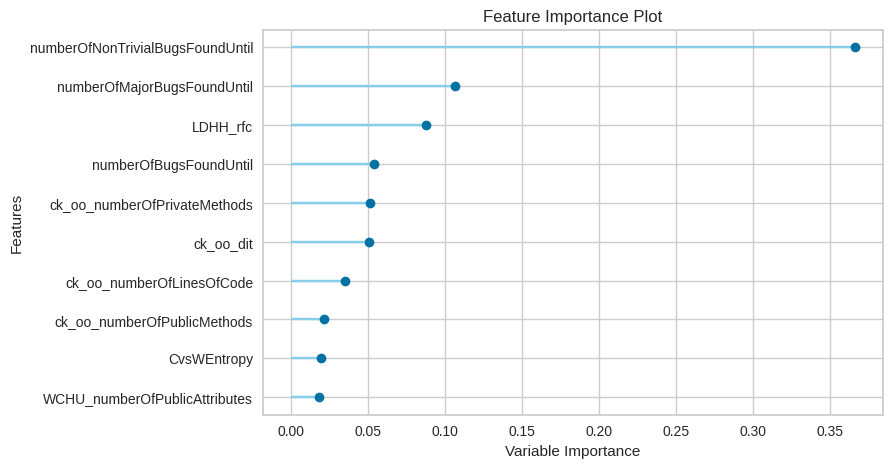

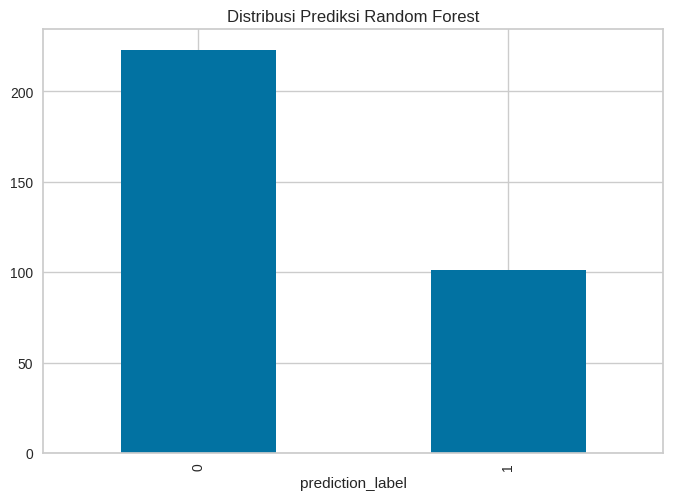

In [25]:
# Contoh: Visualisasi feature importance untuk Random Forest
plot_model(tuned_rf, plot='feature')

# Contoh: Distribusi prediksi untuk Random Forest
import matplotlib.pyplot as plt
rf_predictions['prediction_label'].value_counts().plot(kind='bar')
plt.title('Distribusi Prediksi Random Forest')
plt.show()

# **CPDP_SDP_PDE-JDT.**

In [26]:
# Load dataset AEEEM (JDT sebagai sumber, Mylyn sebagai target)
# Ganti dengan path dataset Anda
#source_data = pd.read_csv('/content/drive/MyDrive/WPDP/dataset/PDE.csv')  # Dataset sumber: PDE
target_data_jdt = pd.read_csv('/content/drive/MyDrive/WPDP/dataset/JDT.csv')  # Dataset target: JDT

target_data_jdt.head()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,0.0,0.000934,0.000000,4.0,0.00,0.00,0.004517,0.00000,0.00,0.0,...,0.000993,0.025009,0.000969,127.0,4.0,0.001007,1.03,0.198199,0.001036,b'0'
1,0.0,0.000741,0.000000,3.0,0.00,0.00,0.014817,0.00091,0.00,0.0,...,0.000889,0.001487,0.002523,8.0,9.0,0.000967,2.06,0.239334,0.000923,b'0'
2,0.0,0.000000,0.000000,4.0,0.00,1.01,0.024575,0.00000,0.00,0.0,...,0.002827,0.021650,0.003656,45.0,1.0,0.002917,1.20,0.187460,0.000000,b'0'
3,0.0,0.001529,0.015913,35.0,0.00,0.00,0.347495,0.00165,2.03,0.0,...,0.010602,0.012864,0.060975,94.0,21.0,0.027947,24.14,0.392389,0.001669,b'1'
4,0.0,0.000000,0.000000,2.0,1.01,1.01,0.012120,0.00000,0.00,0.0,...,0.005223,0.023725,0.006207,73.0,0.0,0.007285,2.15,0.047726,0.000000,b'0'


In [27]:
print("\nDistribusi Kelas Target:")
print(target_data_jdt['class'].value_counts())


Distribusi Kelas Target:
class
b'0'    791
b'1'    206
Name: count, dtype: int64


In [28]:
# Pra-pemrosesan data
# Konversi kolom 'class' dari b'1'/b'0' ke 1/0
#source_data['class'] = source_data['class'].astype(str).str.replace(r"^b'|\'$", "", regex=True).astype(int)
target_data_jdt['class'] = target_data_jdt['class'].astype(str).str.replace(r"^b'|\'$", "", regex=True).astype(int)

In [29]:
print("\nDistribusi Kelas Target:")
print(source_data['class'].value_counts())
print("\nDistribusi Kelas Target:")
print(target_data_jdt['class'].value_counts())


Distribusi Kelas Target:
class
0    1288
1     209
Name: count, dtype: int64

Distribusi Kelas Target:
class
0    791
1    206
Name: count, dtype: int64


In [30]:
train_features = source_data.drop(columns='class').columns.tolist()
test_features = target_data_jdt.drop(columns='class', errors='ignore').columns.tolist()

# Cek apakah keduanya sama
if train_features == test_features:
    print("✅ Fitur training dan testing SAMA.")
else:
    print("❌ Fitur TIDAK sama!")

    # Tampilkan perbedaannya
    missing_in_test = set(train_features) - set(test_features)
    missing_in_train = set(test_features) - set(train_features)

    if missing_in_test:
        print("🔻 Fitur yang ADA di training TAPI TIDAK ada di testing:")
        print(missing_in_test)

    if missing_in_train:
        print("🔺 Fitur yang ADA di testing TAPI TIDAK ada di training:")
        print(missing_in_train)

✅ Fitur training dan testing SAMA.


**Uji Data sebelum dilakukan Tuning Models**

In [31]:
# Prediksi dengan dataset target JDT menggunakan masing-masing model yang sudah di-tuned
rf_predictions = predict_model(rf, data=target_data_jdt)
knn_predictions = predict_model(knn, data=target_data_jdt)
svm_predictions = predict_model(svm, data=target_data_jdt)
lr_predictions = predict_model(lr, data=target_data_jdt)
catboost_predictions = predict_model(catboost, data=target_data_jdt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7984,0.7728,0.4320,0.5145,0.4697,0.3464,0.3484


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6048,0.6701,0.6796,0.2991,0.4154,0.1802,0.2149


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6830,0.6602,0.6214,0.3497,0.4476,0.2490,0.2692


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7101,0.6196,0.4854,0.3534,0.4090,0.2232,0.2282


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8104,0.7858,0.5049,0.5445,0.5239,0.4058,0.4062


**Uji Data setelah dilakukan Tuning Models**

In [32]:
# Prediksi dengan dataset target EQ menggunakan masing-masing model yang sudah di-tuned
rf_predictions = predict_model(tuned_rf, data=target_data_jdt)
knn_predictions = predict_model(tuned_knn, data=target_data_jdt)
svm_predictions = predict_model(tuned_svm, data=target_data_jdt)
lr_predictions = predict_model(tuned_lr, data=target_data_jdt)
catboost_predictions = predict_model(tuned_catboost, data=target_data_jdt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7252,0.7832,0.7427,0.4091,0.5276,0.3560,0.3875


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7753,0.8041,0.7330,0.4719,0.5741,0.4311,0.4504


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7352,0.7470,0.7670,0.4225,0.5448,0.3795,0.4130


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7101,0.6196,0.4854,0.3534,0.4090,0.2232,0.2282


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6550,0.7693,0.7864,0.3506,0.4850,0.2790,0.3306


**ENSEMBLE**

In [35]:
from sklearn.svm import SVC # Import SVC

# Creating SVM model with probability=True
svm = create_model(SVC(probability=True))  # Assuming SVC is the intended model

# Re-tuning the model
#tuned_svm = tune_model(svm, optimize='F1', n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7905,0.7323,0.5000,0.3182,0.3889,0.2699,0.2800
1,0.7238,0.7319,0.4667,0.2500,0.3256,0.1714,0.1846
2,0.7238,0.7726,0.4667,0.2500,0.3256,0.1714,0.1846
3,0.7619,0.6467,0.4000,0.2727,0.3243,0.1860,0.1911
4,0.7333,0.7867,0.6667,0.3030,0.4167,0.2741,0.3099
5,0.7238,0.6081,0.4000,0.2308,0.2927,0.1362,0.1441
6,0.7905,0.8044,0.5333,0.3478,0.4211,0.3000,0.3102
7,0.7981,0.8135,0.5714,0.3478,0.4324,0.3184,0.3329
8,0.7885,0.8111,0.4286,0.3000,0.3529,0.2312,0.2364


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
# Buat ensemble model (soft voting)
#blended_model = blend_models(estimator_list=[tuned_rf, tuned_knn, tuned_svm, tuned_lr, tuned_catboost], method='soft')
# Buat ensemble model (hard voting)
blended_model = blend_models(estimator_list=[tuned_rf, tuned_knn, tuned_svm, tuned_lr, tuned_catboost], method='hard')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.0000,0.5000,0.3500,0.4118,0.3023,0.3092
1,0.7048,0.0000,0.5333,0.2500,0.3404,0.1811,0.2027
2,0.8286,0.0000,0.6000,0.4286,0.5000,0.4000,0.4082
3,0.8095,0.0000,0.4667,0.3684,0.4118,0.3000,0.3030
4,0.7429,0.0000,0.4667,0.2692,0.3415,0.1957,0.2072
5,0.7048,0.0000,0.3333,0.1923,0.2439,0.0766,0.0811
6,0.8286,0.0000,0.7333,0.4400,0.5500,0.4522,0.4747
7,0.8173,0.0000,0.6429,0.3913,0.4865,0.3833,0.4008
8,0.8846,0.0000,0.7143,0.5556,0.6250,0.5581,0.5642


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [38]:
# 4. Prediksi pada dataset test (JDT)
ensemble_predictions = predict_model(blended_model, data=target_data_jdt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7482,0.7480,0.7476,0.4363,0.5510,0.3924,0.4199


In [39]:
from sklearn.metrics import f1_score, classification_report

# true_labels should come from target_data_jdt, not target_data
true_labels = target_data_jdt['class']
predicted_labels = ensemble_predictions['prediction_label']

# Hitung F1-score
print("F1 Score Ensemble:", f1_score(true_labels, predicted_labels, average='weighted'))
print("Classification Report Ensemble:\n", classification_report(true_labels, predicted_labels))

F1 Score Ensemble: 0.768451941627054
Classification Report Ensemble:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       791
           1       0.44      0.75      0.55       206

    accuracy                           0.75       997
   macro avg       0.68      0.75      0.69       997
weighted avg       0.82      0.75      0.77       997



**Analisis Hasil Prediksi**

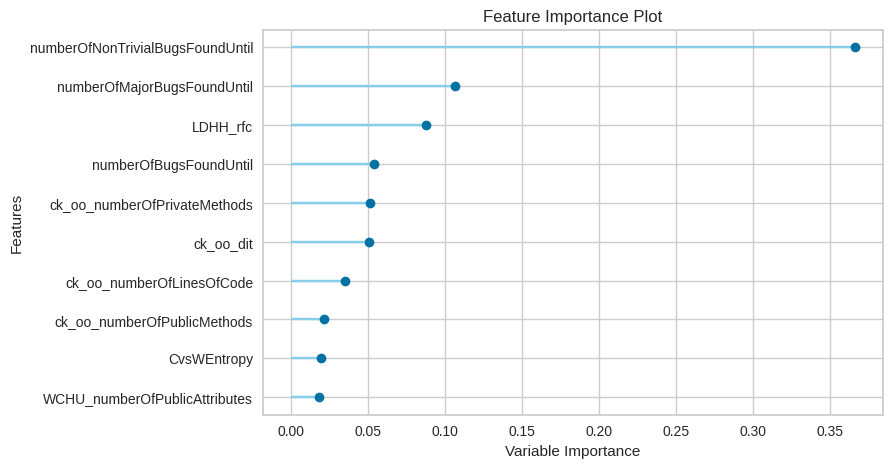

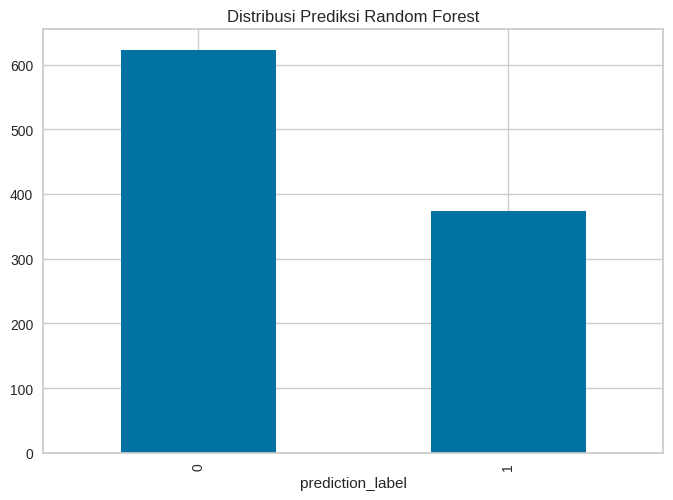

In [33]:
# Contoh: Visualisasi feature importance untuk Random Forest
plot_model(tuned_rf, plot='feature')

# Contoh: Distribusi prediksi untuk Random Forest
import matplotlib.pyplot as plt
rf_predictions['prediction_label'].value_counts().plot(kind='bar')
plt.title('Distribusi Prediksi Random Forest')
plt.show()

# **CPDP_SDP_ML-LC.**

In [40]:
# Load dataset AEEEM (JDT sebagai sumber, Mylyn sebagai target)
# Ganti dengan path dataset Anda
#source_data = pd.read_csv('/content/drive/MyDrive/WPDP/dataset/PDE.csv')  # Dataset sumber: PDE
target_data_lc = pd.read_csv('/content/drive/MyDrive/WPDP/dataset/LC.csv')  # Dataset target: LC

target_data_lc.head()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,0.0,0.000000,0.01525,2.0,0.0,0.00,0.033871,0.002200,4.04,0.000000,...,0.000000,0.010398,0.000000,18.0,3.0,0.015814,0.00,0.016969,0.000000,b'0'
1,0.0,0.000000,0.00000,1.0,0.0,0.00,0.000518,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,9.0,0.0,0.000000,0.00,0.045793,0.000000,b'0'
2,7.0,0.002984,0.00000,4.0,0.0,1.01,0.318565,0.003137,0.00,0.002748,...,0.020279,0.005149,0.002921,9.0,12.0,0.015089,1.16,0.069272,0.003155,b'0'
3,12.0,0.000000,0.00000,1.0,0.0,0.00,0.000833,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,35.0,1.0,0.000000,0.00,0.099579,0.000000,b'0'
4,0.0,0.000000,0.00000,1.0,0.0,0.00,0.076471,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,15.0,6.0,0.000000,0.00,0.067865,0.000000,b'0'


In [41]:
print("\nDistribusi Kelas Target:")
print(source_data['class'].value_counts())
print("\nDistribusi Kelas Target:")
print(target_data_lc['class'].value_counts())


Distribusi Kelas Target:
class
0    1288
1     209
Name: count, dtype: int64

Distribusi Kelas Target:
class
b'0'    627
b'1'     64
Name: count, dtype: int64


In [42]:
# Pra-pemrosesan data
# Konversi kolom 'class' dari b'1'/b'0' ke 1/0
source_data['class'] = source_data['class'].astype(str).str.replace(r"^b'|\'$", "", regex=True).astype(int)
target_data_lc['class'] = target_data_lc['class'].astype(str).str.replace(r"^b'|\'$", "", regex=True).astype(int)

In [43]:
print("\nDistribusi Kelas Target:")
print(source_data['class'].value_counts())
print("\nDistribusi Kelas Target:")
print(target_data_lc['class'].value_counts())


Distribusi Kelas Target:
class
0    1288
1     209
Name: count, dtype: int64

Distribusi Kelas Target:
class
0    627
1     64
Name: count, dtype: int64


In [44]:
train_features = source_data.drop(columns='class').columns.tolist()
test_features = target_data_lc.drop(columns='class', errors='ignore').columns.tolist()

# Cek apakah keduanya sama
if train_features == test_features:
    print("✅ Fitur training dan testing SAMA.")
else:
    print("❌ Fitur TIDAK sama!")

    # Tampilkan perbedaannya
    missing_in_test = set(train_features) - set(test_features)
    missing_in_train = set(test_features) - set(train_features)

    if missing_in_test:
        print("🔻 Fitur yang ADA di training TAPI TIDAK ada di testing:")
        print(missing_in_test)

    if missing_in_train:
        print("🔺 Fitur yang ADA di testing TAPI TIDAK ada di training:")
        print(missing_in_train)


✅ Fitur training dan testing SAMA.


**Uji Data sebelum dilakukan Tuning Models**

In [45]:
# Prediksi dengan dataset target JDT menggunakan masing-masing model yang sudah di-tuned
rf_predictions = predict_model(rf, data=target_data_lc)
knn_predictions = predict_model(knn, data=target_data_lc)
svm_predictions = predict_model(svm, data=target_data_lc)
lr_predictions = predict_model(lr, data=target_data_lc)
catboost_predictions = predict_model(catboost, data=target_data_lc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9088,0.7594,0.2969,0.5135,0.3762,0.3308,0.3453


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7742,0.7026,0.5156,0.2089,0.2973,0.1906,0.2183


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.7569,0.6975,0.3438,0.1486,0.2075,0.0898,0.1009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7438,0.7466,0.7188,0.2244,0.3420,0.2339,0.2952


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9204,0.7274,0.2812,0.6667,0.3956,0.3605,0.3993


**Uji Data setelah dilakukan Tuning Models**

In [46]:
# Prediksi dengan dataset target EQ menggunakan masing-masing model yang sudah di-tuned
rf_predictions = predict_model(tuned_rf, data=target_data_lc)
knn_predictions = predict_model(tuned_knn, data=target_data_lc)
svm_predictions = predict_model(tuned_svm, data=target_data_lc)
lr_predictions = predict_model(tuned_lr, data=target_data_lc)
catboost_predictions = predict_model(tuned_catboost, data=target_data_lc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8524,0.7929,0.4062,0.2889,0.3377,0.2573,0.2620


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8437,0.7061,0.4531,0.2843,0.3494,0.2658,0.2752


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8712,0.6695,0.4219,0.3418,0.3776,0.3067,0.3088


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7438,0.7466,0.7188,0.2244,0.3420,0.2339,0.2952


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8408,0.7939,0.4688,0.2830,0.3529,0.2684,0.2796


**Analisis Hasil Prediksi**

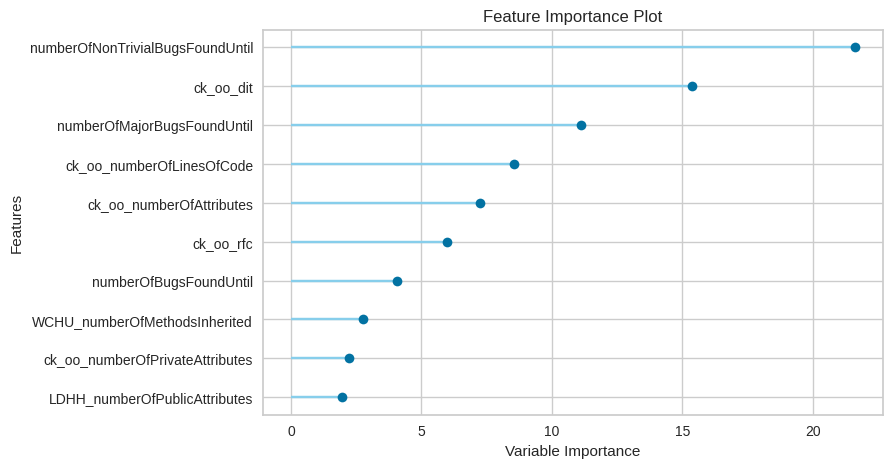

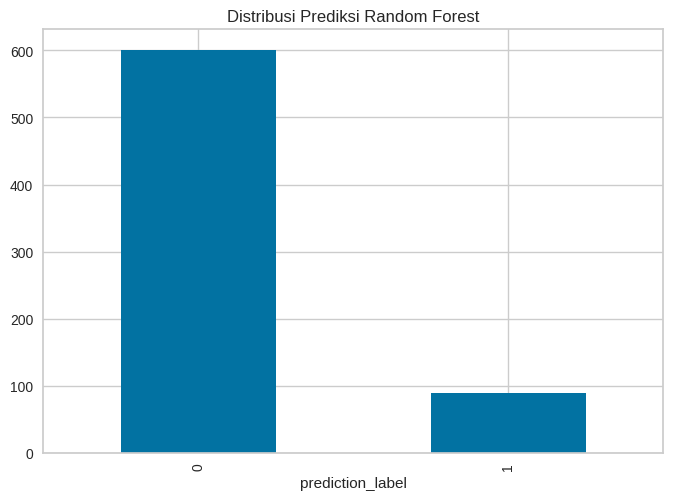

In [47]:
# Contoh: Visualisasi feature importance untuk Random Forest
plot_model(tuned_catboost, plot='feature')

# Contoh: Distribusi prediksi untuk Random Forest
import matplotlib.pyplot as plt
rf_predictions['prediction_label'].value_counts().plot(kind='bar')
plt.title('Distribusi Prediksi Random Forest')
plt.show()

# **CPDP_SDP_PDE-ML.**

In [49]:
# 1. Load dataset AEEEM (JDT sebagai sumber, Mylyn sebagai target)
# Ganti dengan path dataset Anda
#source_data = pd.read_csv('/content/drive/MyDrive/WPDP/dataset/PDE.csv')  # Dataset sumber: PDE
target_data_ml = pd.read_csv('/content/drive/MyDrive/WPDP/dataset/ML.csv')  # Dataset target: ML

target_data_ml.head()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,1.0,0.019228,0.024845,4.0,0.0,1.01,0.002216,0.018552,1.02,0.017874,...,0.000000,0.002801,0.020688,36.0,6.0,0.023730,1.15,0.116244,0.019133,b'0'
1,0.0,0.000000,0.000000,20.0,0.0,0.00,0.278898,0.000000,0.00,0.000000,...,0.013098,0.009791,0.006229,9.0,1.0,0.014303,3.13,0.254718,0.000000,b'1'
2,1.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,9.0,1.0,0.000000,0.00,0.000000,0.000000,b'1'
3,0.0,0.000734,0.056522,6.0,0.0,1.01,0.013173,0.001171,8.10,0.001505,...,0.000000,0.009791,0.000900,18.0,14.0,0.055485,3.10,0.347682,0.001253,b'0'
4,0.0,0.000000,0.010560,5.0,0.0,0.00,0.042989,0.000000,5.11,0.000000,...,0.022584,0.016354,0.002214,31.0,12.0,0.032393,2.04,0.262198,0.000000,b'0'


In [50]:
print("\nDistribusi Kelas Target:")
print(source_data['class'].value_counts())
print("\nDistribusi Kelas Target:")
print(target_data_ml['class'].value_counts())


Distribusi Kelas Target:
class
0    1288
1     209
Name: count, dtype: int64

Distribusi Kelas Target:
class
b'0'    1617
b'1'     245
Name: count, dtype: int64


In [51]:
# Pra-pemrosesan data
# Konversi kolom 'class' dari b'1'/b'0' ke 1/0
source_data['class'] = source_data['class'].astype(str).str.replace(r"^b'|\'$", "", regex=True).astype(int)
target_data_ml['class'] = target_data_ml['class'].astype(str).str.replace(r"^b'|\'$", "", regex=True).astype(int)

In [52]:
print("\nDistribusi Kelas Target:")
print(source_data['class'].value_counts())
print("\nDistribusi Kelas Target:")
print(target_data_ml['class'].value_counts())


Distribusi Kelas Target:
class
0    1288
1     209
Name: count, dtype: int64

Distribusi Kelas Target:
class
0    1617
1     245
Name: count, dtype: int64


In [53]:
train_features = source_data.drop(columns='class').columns.tolist()
test_features = target_data_ml.drop(columns='class', errors='ignore').columns.tolist()

# Cek apakah keduanya sama
if train_features == test_features:
    print("✅ Fitur training dan testing SAMA.")
else:
    print("❌ Fitur TIDAK sama!")

    # Tampilkan perbedaannya
    missing_in_test = set(train_features) - set(test_features)
    missing_in_train = set(test_features) - set(train_features)

    if missing_in_test:
        print("🔻 Fitur yang ADA di training TAPI TIDAK ada di testing:")
        print(missing_in_test)

    if missing_in_train:
        print("🔺 Fitur yang ADA di testing TAPI TIDAK ada di training:")
        print(missing_in_train)


✅ Fitur training dan testing SAMA.


**Uji Data sebelum dilakukan Tuning Models**

In [54]:
# Prediksi dengan dataset target JDT menggunakan masing-masing model yang sudah di-tuned
rf_predictions = predict_model(rf, data=target_data_ml)
knn_predictions = predict_model(knn, data=target_data_ml)
svm_predictions = predict_model(svm, data=target_data_ml)
lr_predictions = predict_model(lr, data=target_data_ml)
catboost_predictions = predict_model(catboost, data=target_data_ml)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8287,0.6700,0.2612,0.3168,0.2864,0.1900,0.1912


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.3405,0.5534,0.7265,0.1329,0.2247,0.0029,0.0064


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.8496,0.5137,0.0449,0.1930,0.0728,0.0244,0.0323


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.4705,0.6168,0.6490,0.1501,0.2439,0.0383,0.0631


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8469,0.6897,0.2939,0.3913,0.3357,0.2511,0.2544


**Uji Data setelah dilakukan Tuning Models**

In [55]:
# Prediksi dengan dataset target EQ menggunakan masing-masing model yang sudah di-tuned
rf_predictions = predict_model(tuned_rf, data=target_data_ml)
knn_predictions = predict_model(tuned_knn, data=target_data_ml)
svm_predictions = predict_model(tuned_svm, data=target_data_ml)
lr_predictions = predict_model(tuned_lr, data=target_data_ml)
catboost_predictions = predict_model(tuned_catboost, data=target_data_ml)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7642,0.6551,0.4408,0.2634,0.3298,0.1976,0.2072


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7347,0.6945,0.4980,0.2475,0.3306,0.1879,0.2057


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6660,0.6207,0.5592,0.2104,0.3058,0.1417,0.1711


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.4705,0.6168,0.6490,0.1501,0.2439,0.0383,0.0631


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7009,0.6299,0.5061,0.2214,0.3081,0.1530,0.1743


**Analisis Hasil Prediksi**

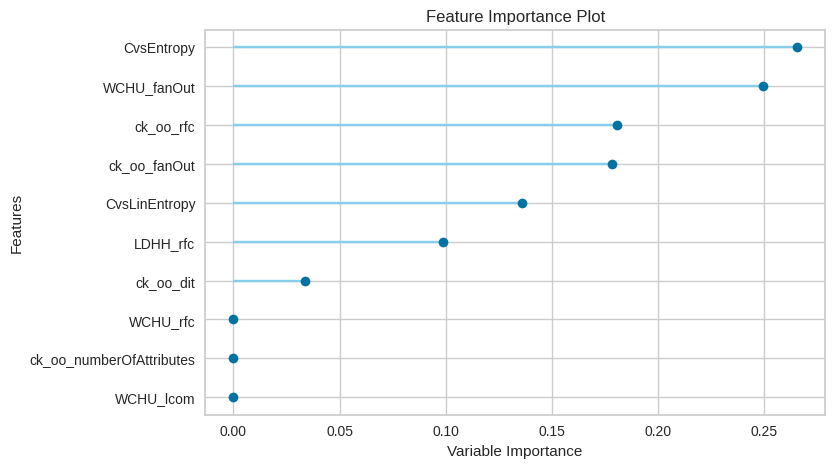

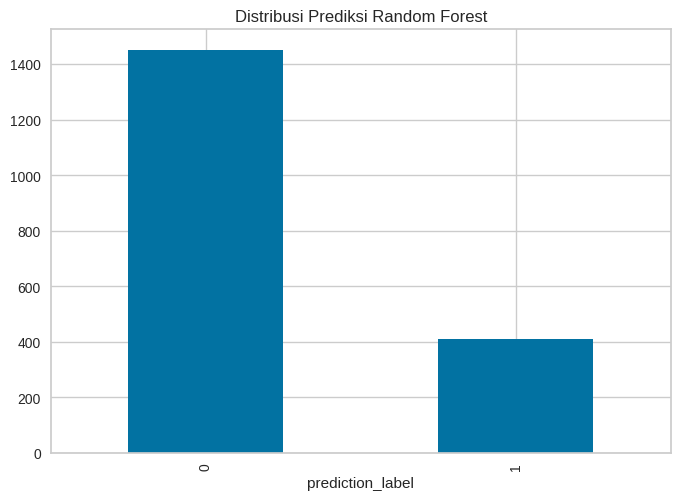

In [56]:
# Contoh: Visualisasi feature importance untuk Random Forest
plot_model(tuned_svm, plot='feature')

# Contoh: Distribusi prediksi untuk Random Forest
import matplotlib.pyplot as plt
rf_predictions['prediction_label'].value_counts().plot(kind='bar')
plt.title('Distribusi Prediksi Random Forest')
plt.show()